# Transfer Learning
Categorical Classification (46 classes) with language

In the transfer learning basically we apply a model already applied to new dataset with fine tuning of the variables.

In this case we are going to use another dataset (reuters dataset) always from keras with text arrays of numbers, where whe have 46 different classifications.

In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers
%matplotlib inline

In [4]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000) 
#same threshold as before
#in this way we are always considering just the 10000 more used words

In [5]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)
print(len(train_data[0]),len(train_data[1]))

(8982,) (8982,) (2246,) (2246,)
87 56


In [4]:
import numpy as np
lenghts = [len(x) for x in train_data]#list comprehension
print('min=',np.min(lenghts))
print('mean',np.mean(lenghts))
print('std=',np.std(lenghts))
print('max',np.max(lenghts))
print('shape',train_data.shape)

min= 13
mean 145.5398574927633
std= 145.81413013409278
max 2376
shape (8982,)


In [6]:
#just to read the data in text but not used for the model
word_index = reuters.get_word_index()
print(len(word_index))  #this is the actual number of possible words, but we have selected just 10k
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) 

30979


In [10]:
#We analyze how many unique values we have with pandas and we verify that we have 46 different values that
#we need to transform in a vector of 0 and 1 (from 1 to 46 features)
x1 = pd.DataFrame(train_labels)
x2 = pd.DataFrame(test_labels)
print(x1.nunique()[0])
print(x2.nunique()[0])

46
46


# Preparing the data for input layer

In [16]:
def vectorize_sequences(sequences,dimension=10000):  #take sequenses and turn them into vectors
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = train_labels[i]   #fancy indexing
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('train shape:',x_train.shape) #this shape means that we have 8982 samples and 10k features
#the 10k features will be the input of our neural network
print('test_shape',x_test.shape)

train shape: (8982, 10000)
test_shape (2246, 10000)


# Preparing the data for output layer

In [20]:
print('train label shape:',train_labels.shape)
print('test_labels shape',test_labels.shape)

from keras.utils import to_categorical
y_train = to_categorical(train_labels) #1 element become an array of 46 elements
y_test = to_categorical(test_labels)

train label shape: (8982,)
test_labels shape (2246,)


# Defining the model architecture

In [21]:
#for each layer the model add weights and biases
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu',input_shape=(10000,)))  #input shape is the same as before
model.add(layers.Dense(46,activation='softmax'))  #we have changed the output layer in 46
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
#we have change also the loss function from binary to categorical because we have more than 2 classes

# Fitting the model

In the fitting we can use the 'validation_split' without splitting the data manually

In [22]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 16s 2ms/step - loss: 2.4433 - acc: 0.7191 - val_loss: 2.1370 - val_acc: 0.7757
Epoch 2/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.4408 - acc: 0.8779 - val_loss: 2.0858 - val_acc: 0.7863
Epoch 3/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.2437 - acc: 0.8976 - val_loss: 2.1052 - val_acc: 0.7930
Epoch 4/10
7185/7185 [==============================] - 16s 2ms/step - loss: 1.1675 - acc: 0.9116 - val_loss: 2.1185 - val_acc: 0.8024
Epoch 5/10
7185/7185 [==============================] - 16s 2ms/step - loss: 1.1488 - acc: 0.9140 - val_loss: 2.1961 - val_acc: 0.7902
Epoch 6/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.1469 - acc: 0.9165 - val_loss: 2.1781 - val_acc: 0.7830
Epoch 7/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.1418 - acc: 0.9164 - val_loss: 2.1480 - val_acc: 0.7986
Epoch 8

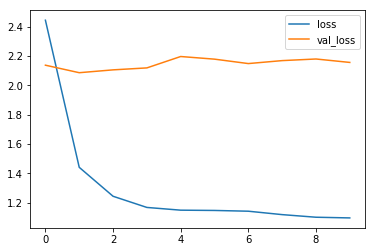

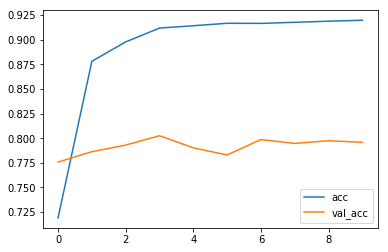

In [24]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss') 
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()
plt.show()
plt.close()

In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [30]:
for key in history.history.keys():
    print(key,history.history[key],'\n')

val_loss [2.1370021335005296, 2.0857722479300693, 2.1051612545134426, 2.1184924915889005, 2.196136954100051, 2.178130250409635, 2.148021606451681, 2.1681643752966844, 2.1792199989790113, 2.155847000160281] 

val_acc [0.7757373400774676, 0.7863105175955533, 0.7929883139227654, 0.8024485253863157, 0.790205898786427, 0.7829716194319473, 0.798553144195442, 0.7946577630045684, 0.7974401781409066, 0.7957707290591036] 

loss [2.443331854751563, 1.4408268001067945, 1.2436565815591012, 1.1674833771092823, 1.1488307777675557, 1.1469410946199938, 1.1417700602976306, 1.1185143940632927, 1.1007220672250375, 1.0960529448275025] 

acc [0.7191370911870305, 0.8779401531133207, 0.8975643702157272, 0.9116214335421016, 0.913987473920558, 0.9164926931189429, 0.9163535142658316, 0.9174669450409477, 0.9185803758077681, 0.9195546276965901] 



In [31]:
#We can see that the accuracy of the model in the validation set is much lower than the accuracy of the training
#set, this means that we have overfitting in our model
#The graph below is for the accuracy, but we have the same in the loss function in the opposite side
#The idea is to consider the number of epochs when the val_loss is lowest (val_acc is higher)
#The gap is due to the information leaks

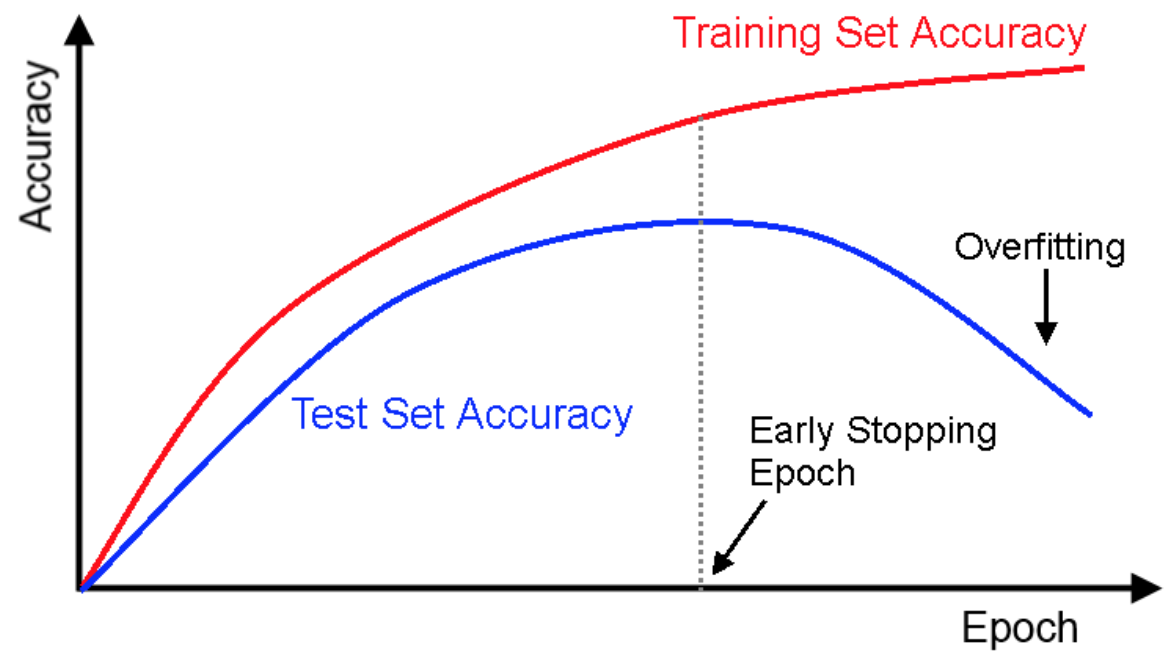